In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df_train = pd.read_csv('./data/linear-reg/train.csv')
df_test = pd.read_csv('./data/linear-reg/test.csv')

In [131]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [132]:
len(df_train)

700

In [133]:
df_train = df_train.dropna(axis=0)

In [134]:
len(df_test)

300

In [135]:
df_train.iloc[0]['y']

21.54945196

In [136]:
len(df_train)

699

In [137]:
# since our model just takes in data in an array, we'll feed in data as an array

In [138]:
x_train = []
x_test = []
y_train = []
y_test = []

for i in range(len(df_train)):
    x_train.append(df_train.iloc[i]['x'])
    y_train.append(df_train.iloc[i]['y'])

In [139]:
x_train[:10]

[24.0, 50.0, 15.0, 38.0, 87.0, 36.0, 12.0, 81.0, 25.0, 5.0]

In [140]:
y_train[:10]

[21.54945196,
 47.46446305,
 17.21865634,
 36.58639803,
 87.28898389,
 32.46387493,
 10.78089683,
 80.76339859999999,
 24.61215147,
 6.963319071]

In [141]:
for i in range(len(df_test)):
    x_test.append(df_test.iloc[i]['x'])
    y_test.append(df_test.iloc[i]['y'])

In [142]:
x_test[:10]

[77.0, 21.0, 22.0, 20.0, 36.0, 15.0, 62.0, 95.0, 20.0, 5.0]

In [143]:
y_test[:10]

[79.77515201,
 23.17727887,
 25.60926156,
 17.85738813,
 41.84986439,
 9.805234876,
 58.87465933,
 97.61793701,
 18.39512747,
 8.746747654]

In [144]:
# now to convert them to a numpy array. this step is not needed, but i'll do it anyway

In [145]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [146]:
print(f'x train: {len(x_train)}, y train: {len(y_train)}\n')
print(f'x test: {len(x_test)}, y test: {len(y_test)}')

x train: 699, y train: 699

x test: 300, y test: 300


In [147]:
# now for some plots

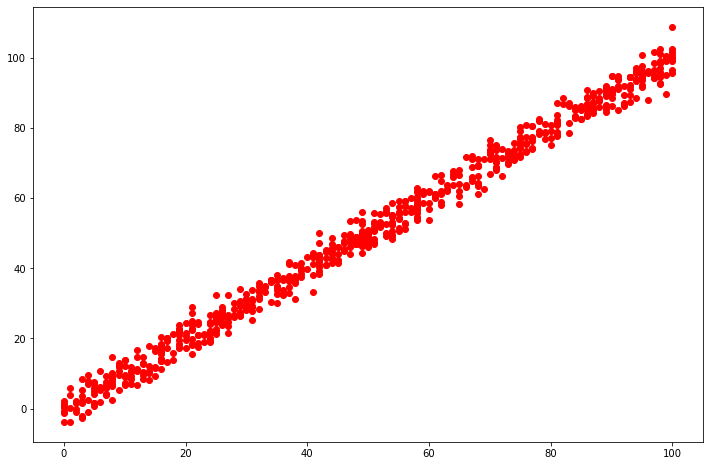

In [148]:
plt.figure(figsize=(12, 8))

plt.plot(x_train, y_train, 'ro')
plt.show()

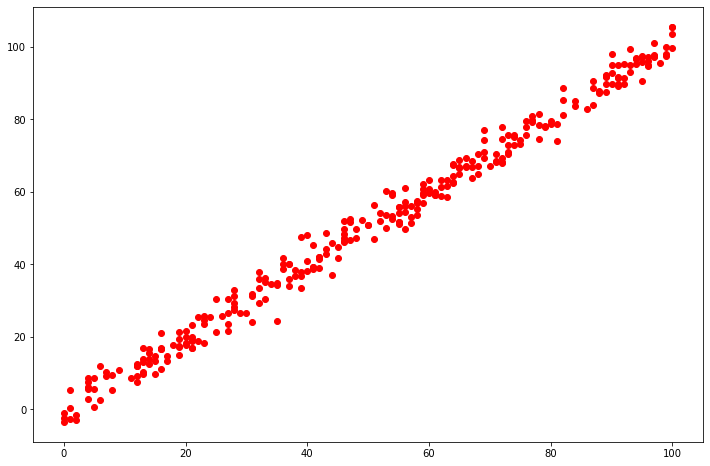

In [149]:
plt.figure(figsize=(12, 8))

plt.plot(x_test, y_test, 'ro')
plt.show()

In [150]:
# now unlike the other notebook, i'll try to define functions for faster calculations

In [151]:
def find_summation(decider):
    if decider == 'train':
        sx = np.sum(x_train)
        sy = np.sum(y_train)
        sx2 = np.sum(x_train**2)
        sx3 = np.sum(x_train**3)
        sx4 = np.sum(x_train**4)
        sxy = np.sum(x_train*y_train)
        sx2y = np.sum((x_train**2)*y_train)

        return [sx, sy, sx2, sx3, sx4, sxy, sx2y]
    else:
        sx = np.sum(x_test)
        sy = np.sum(y_test)
        sx2 = np.sum(x_test**2)
        sx3 = np.sum(x_test**3)
        sx4 = np.sum(x_test**4)
        sxy = np.sum(x_test*y_test)
        sx2y = np.sum((x_test**2)*y_test)
        return [sx, sy, sx2, sx3, sx4, sxy, sx2y]

In [152]:
[sx, sy, sx2, sx3, sx4, sxy, sx2y] = find_summation('train')

In [153]:
b = np.array([sy, sxy, sx2y])
a = np.array([[len(x_train), sx, sx2], [sx, sx2, sx3], [sx2, sx3, sx4]])

In [154]:
a

array([[6.99000000e+02, 3.49600000e+04, 2.33368000e+06],
       [3.49600000e+04, 2.33368000e+06, 1.76380144e+08],
       [2.33368000e+06, 1.76380144e+08, 1.42874588e+10]])

In [157]:
b

array([3.49079686e+04, 2.33146178e+06, 1.76174490e+08])

In [158]:
roots = np.linalg.solve(a, b)

In [159]:
def predict(x_new):
    x_sq = x_new**2
    pred = roots[0] + roots[1]*x_new + roots[2]*x_sq
    # print(f'pred: {pred}')
    return pred

In [160]:
max(x_train)

100.0

In [161]:
min(x_train)

0.0

In [162]:
x_test[10]

4.0

In [163]:
y_test[10]

2.811415826

In [164]:
predict(4)

3.659833869411577

In [165]:
# the right answer was two, but the model has given 3. Hmm... sounds kinda close

In [172]:
pred = []

def predict_array(x_pred):
    for i in range(len(x_pred)):
        x_sq = x_pred[i]**2
        pred.append(roots[0] + roots[1]*x_pred[i] + roots[2]*x_sq)

    return pred

In [173]:
y_pred = predict_array(x_test)

In [177]:
y_pred[:5]

[76.97097074481941,
 20.8960929104336,
 21.906893394830828,
 19.88494830311958,
 36.02196727012893]

In [178]:
y_test[:5]

array([79.77515201, 23.17727887, 25.60926156, 17.85738813, 41.84986439])

In [179]:
# The values seem to match to some extent, considering this is all implemented from scratch.

In [180]:
from sklearn.metrics import mean_squared_error as mse

In [182]:
np.sqrt(mse(y_test, y_pred))

3.0763037098292334